In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('walmarttrain.csv')
test = pd.read_csv('walmarttest.csv')
stores = pd.read_csv('walmartstores.csv')
feature = pd.read_csv('walmartfeatures.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train['day'] = pd.DatetimeIndex(train['Date']).day
train.drop(['Date'], axis=1,inplace=True)

In [11]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,year,month,day
0,1,1,24924.50,False,2010,2,5
1,1,1,46039.49,True,2010,2,12
2,1,1,41595.55,False,2010,2,19
3,1,1,19403.54,False,2010,2,26
4,1,1,21827.90,False,2010,3,5


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

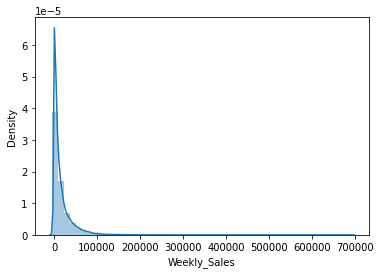

In [12]:
sns.distplot(train['Weekly_Sales'])

In [13]:
train.Weekly_Sales = np.where(train.Weekly_Sales > 150000, 150000, train.Weekly_Sales)

<AxesSubplot:ylabel='Frequency'>

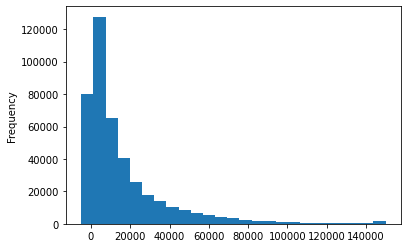

In [14]:
train.Weekly_Sales.plot.hist(bins = 25)

In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

train['IsHoliday'] = label.fit_transform(train['IsHoliday'])

In [16]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,year,month,day
0,1,1,24924.50,0,2010,2,5
1,1,1,46039.49,1,2010,2,12
2,1,1,41595.55,0,2010,2,19
3,1,1,19403.54,0,2010,2,26
4,1,1,21827.90,0,2010,3,5


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

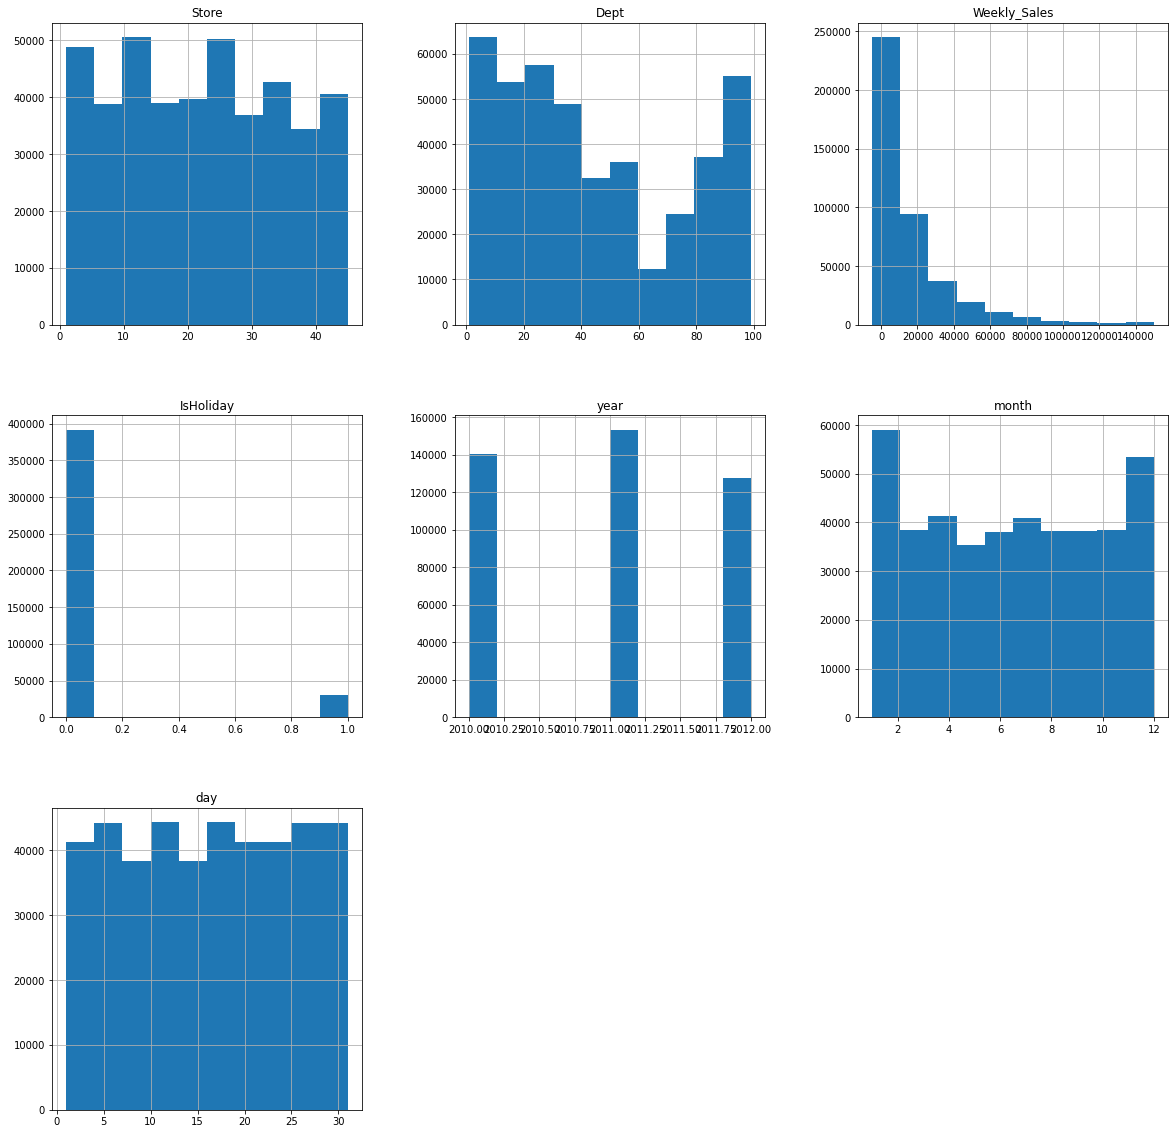

In [17]:
train.hist(figsize = (20,20))

<AxesSubplot:xlabel='day', ylabel='Weekly_Sales'>

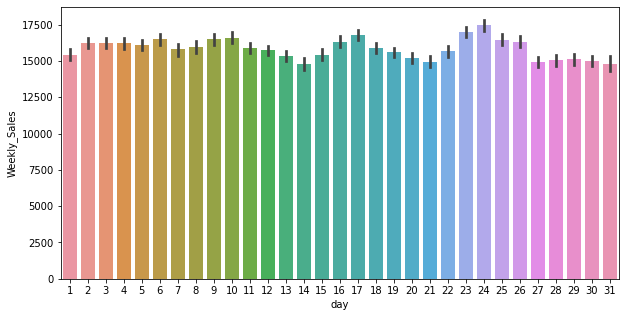

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'day', y = 'Weekly_Sales', data = train)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

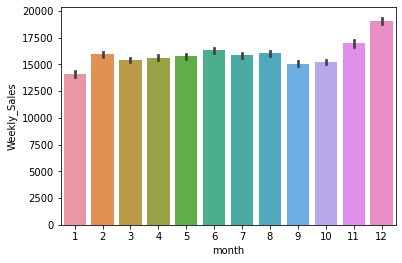

In [19]:
sns.barplot(x='month', y='Weekly_Sales', data=train)

Text(0.5, 0, 'Sales')

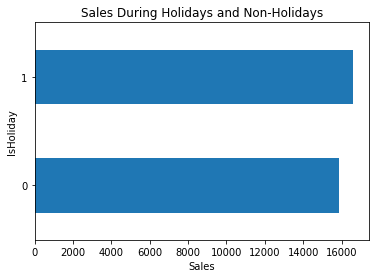

In [20]:
train.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind = 'barh')
plt.title('Sales During Holidays and Non-Holidays')
plt.xlabel('Sales')

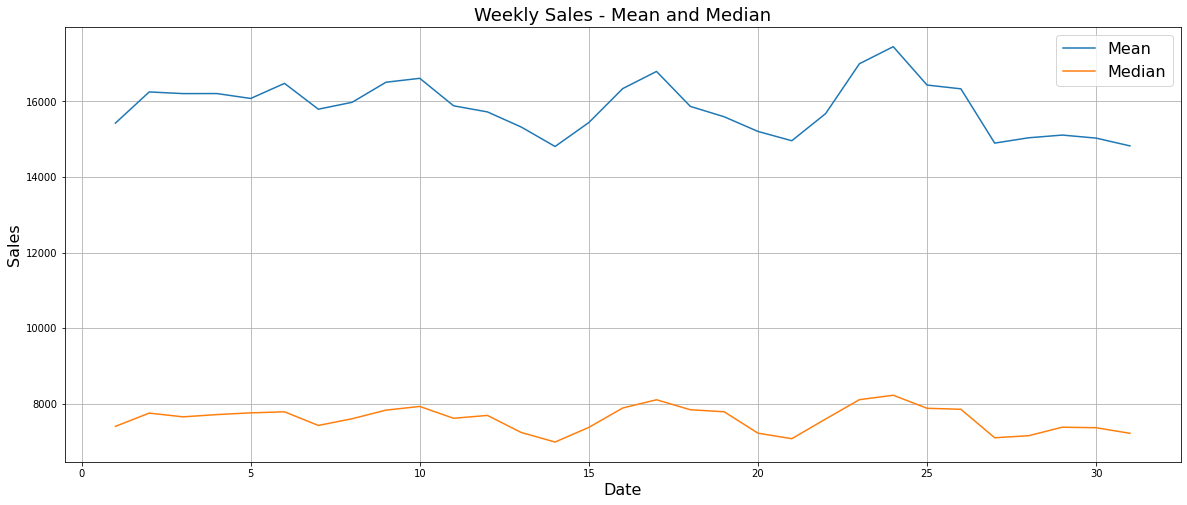

In [21]:
weekly_sales_mean = train['Weekly_Sales'].groupby(train['day']).mean()
weekly_sales_median = train['Weekly_Sales'].groupby(train['day']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

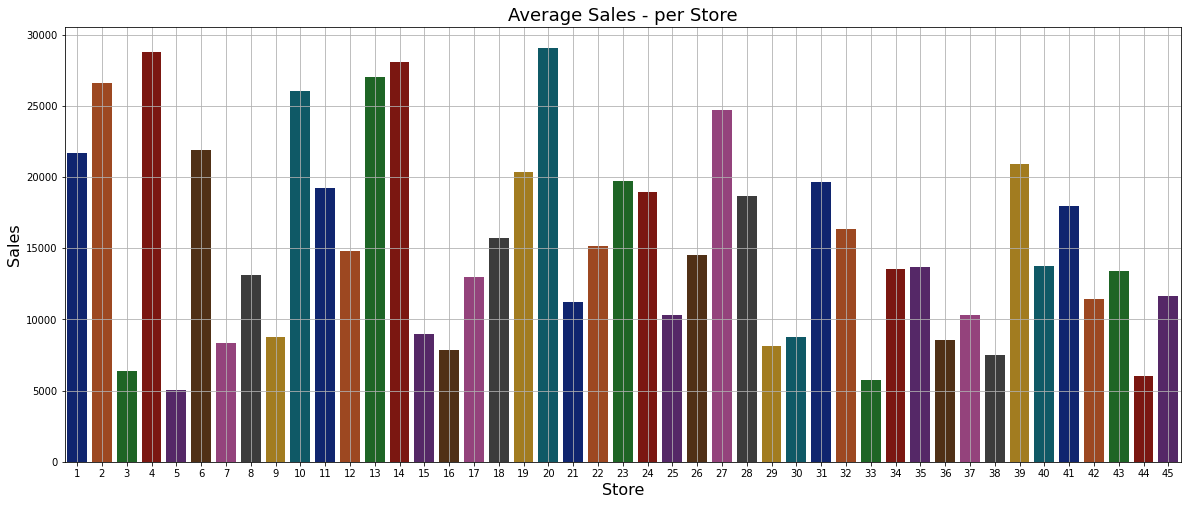

In [22]:
weekly_sales = train['Weekly_Sales'].groupby(train['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

<AxesSubplot:>

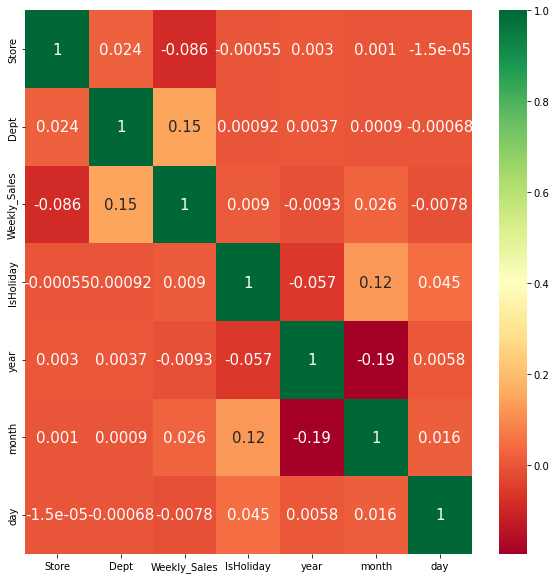

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [24]:
x = train.drop(['Weekly_Sales'], axis = 1)
y = train['Weekly_Sales']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [28]:
regressor = RandomForestRegressor(n_estimators = 150, oob_score = True)
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_test)
acc_rf= round(regressor.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



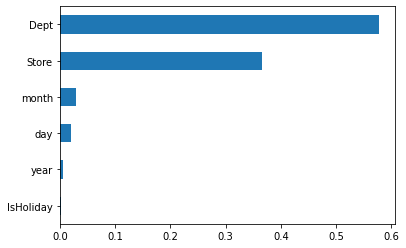

In [29]:
feat_importances = pd.Series(regressor.feature_importances_, index=train.drop('Weekly_Sales', axis =1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()